In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def mnk(x,y,free=1):
    k,a=np.polyfit(x, y, free)
    mu = np.mean(y) # средее
    mv = np.mean(x)
    mu2 = np.mean(y**2)
    mv2 = np.mean(x**2) # средний квадрат
    muv = np.mean (x*y) 
    sigma_k = np.sqrt(1/(x.shape[0]-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    print("Погрешность углового коэфицента")
    print(sigma_k)
    sigma_b = sigma_k * np.sqrt(mv2-mv**2)
    print("Погрешность свободного коэфицента")
    print(sigma_b)
    return (k,a)

In [4]:
data=pd.read_excel("data.xlsx", "Лист1")
data

,T,P0
0,25,37.0
1,30,36.8
2,35,36.4
3,40,36.2
4,45,36.0
5,50,35.6
6,55,35.4
7,60,35.2


In [11]:
data["P"]=data.P0*765*9.81/10**3
data["dP"]=data.P-109
data["sig"]=data.dP/4

In [12]:
print(data.T.style.to_latex(clines="all;data"))

\begin{tabular}{lrrrrrrrr}
 & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
T & 25.000000 & 30.000000 & 35.000000 & 40.000000 & 45.000000 & 50.000000 & 55.000000 & 60.000000 \\
\cline{1-9}
P0 & 37.000000 & 36.800000 & 36.400000 & 36.200000 & 36.000000 & 35.600000 & 35.400000 & 35.200000 \\
\cline{1-9}
P & 277.672050 & 276.171120 & 273.169260 & 271.668330 & 270.167400 & 267.165540 & 265.664610 & 264.163680 \\
\cline{1-9}
dP & 168.672050 & 167.171120 & 164.169260 & 162.668330 & 161.167400 & 158.165540 & 156.664610 & 155.163680 \\
\cline{1-9}
sig & 42.168013 & 41.792780 & 41.042315 & 40.667083 & 40.291850 & 39.541385 & 39.166152 & 38.790920 \\
\cline{1-9}
\end{tabular}



In [17]:
k0,a0=mnk(data["T"], data["sig"])
print(k0,a0)

Погрешность углового коэфицента
0.003460164817645479
Погрешность свободного коэфицента
0.039641167984708695
-0.09916858928571406 44.64722723214285


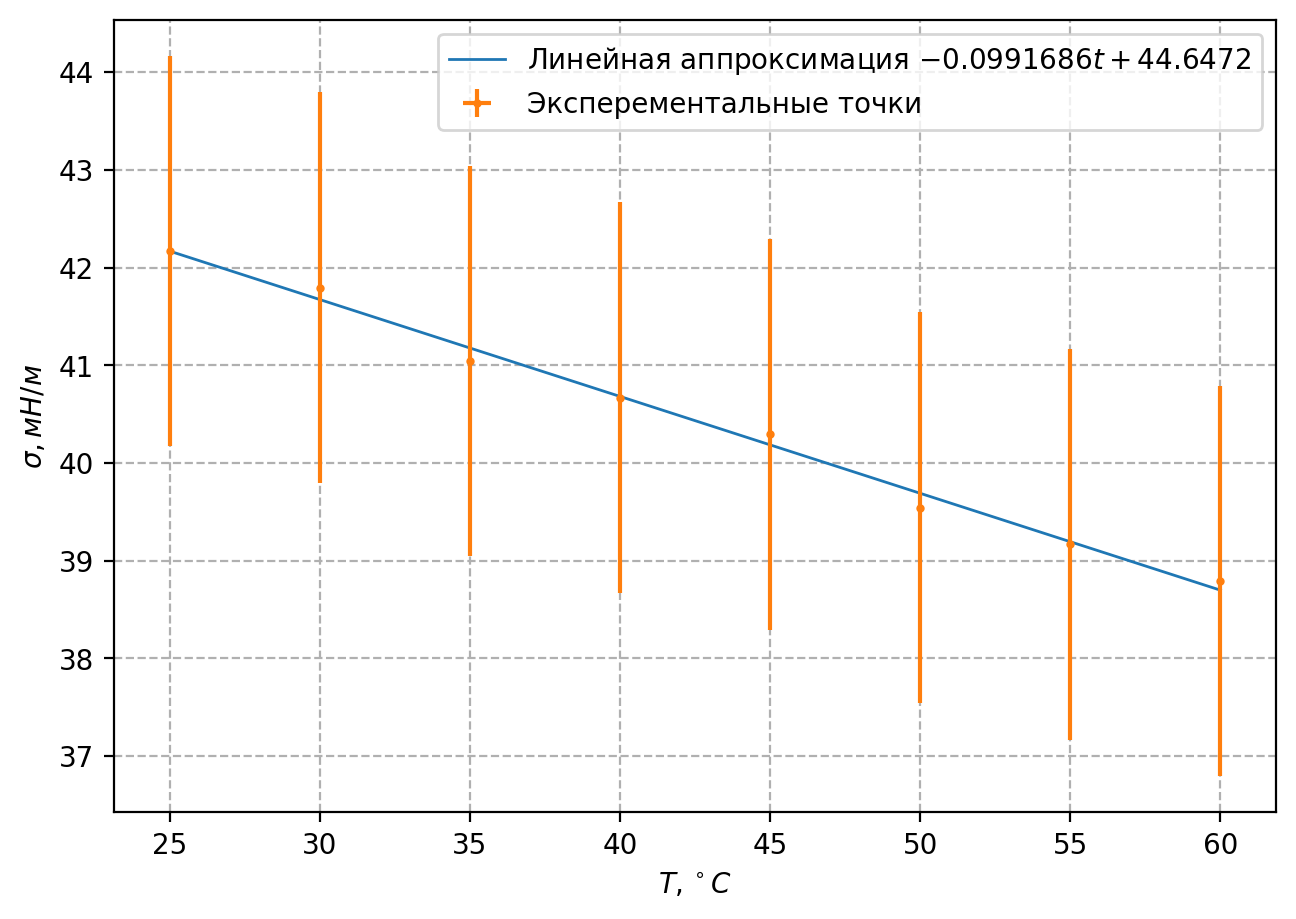

In [19]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$\sigma, мН/м$") # подписи к осям
plt.xlabel("$T, ^\circ C$")
plt.grid(True, linestyle="--") # сетка
plt.plot(data["T"], k0 * data["T"] + a0,linewidth=1, label="Линейная аппроксимация $%.7f t + %.4f$" % (k0, a0)) # аппроксимация
plt.errorbar(data["T"], data["sig"], yerr=2, xerr=0.1, label="Эксперементальные точки", fmt="o", ms=2)
plt.legend() # легенда

In [20]:
data["U"]=data["sig"]+data["T"]*0.099

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


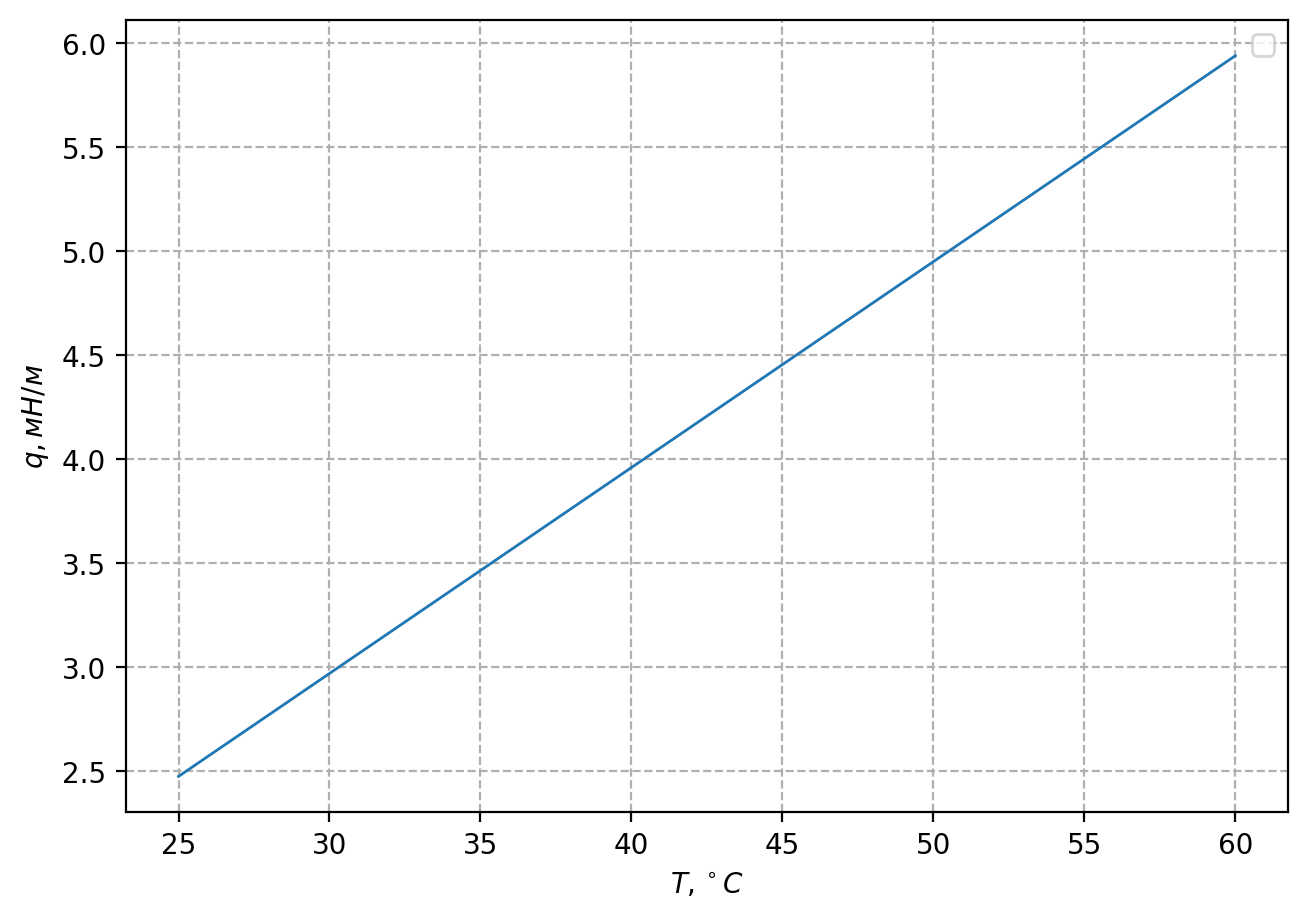

In [21]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$q, мН/м$") # подписи к осям
plt.xlabel("$T, ^\circ C$")
plt.grid(True, linestyle="--") # сетка
plt.plot(data["T"], 0.099 * data["T"] ,linewidth=1) # аппроксимация
plt.legend() # легенда

In [22]:
k1,a1=mnk(data["T"], data["U"])
print(k1,a1)

Погрешность углового коэфицента
0.003460164817647756
Погрешность свободного коэфицента
0.03964116798473478
-0.0001685892857144444 44.647227232142875


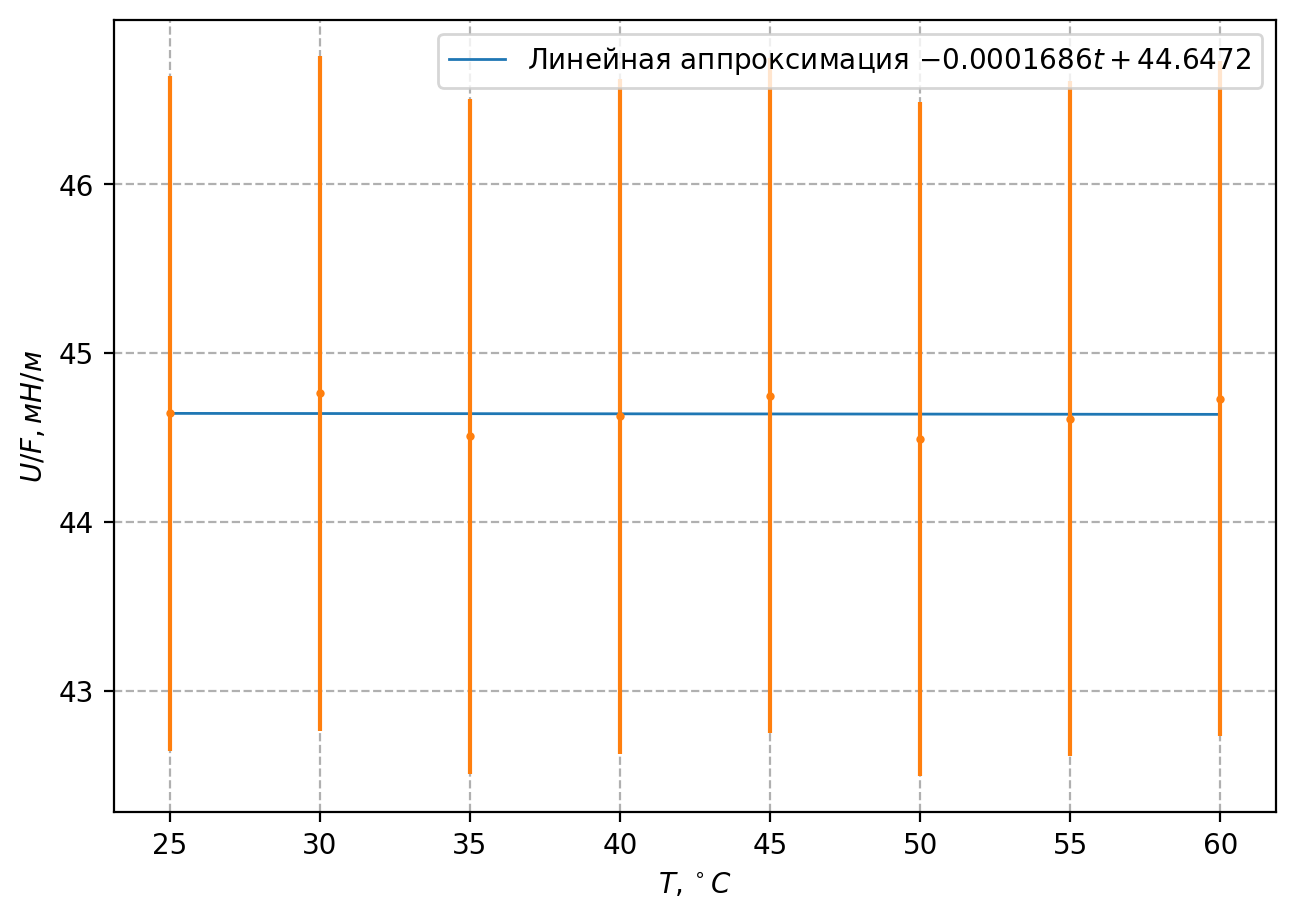

In [24]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$U/F, мН/м$") # подписи к осям
plt.xlabel("$T, ^\circ C$")
plt.grid(True, linestyle="--") # сетка
plt.plot(data["T"], k1 * data["T"] + a1,linewidth=1, label="Линейная аппроксимация $%.7f t + %.4f$" % (k1, a1)) # аппроксимация
plt.errorbar(data["T"], data["U"], yerr=2, xerr=0.1, fmt="o", ms=2)
plt.legend() # легенда